<a href="https://colab.research.google.com/github/Ioshami/Labs/blob/main/%D0%BC%D0%B5%D1%82%D0%BE%D0%B4_%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BA%D0%BE%D1%80%D0%BD%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ЛР2. Решение систем линейных алгебраических уравнений (СЛАУ)

Вариант 3
q=-3.23
d=-2
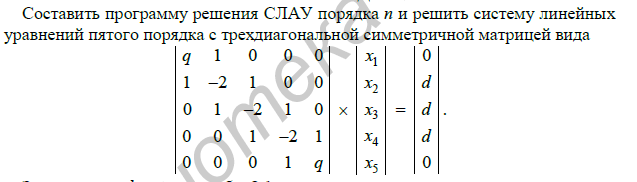

метод квадратного корня

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np

Матрица A

In [2]:
q=-3.23
Ainit=[[q,1,0,0,0],[1,-2,1,0,0],[0,1,-2,1,0],[0,0,1,-2,1],[0,0,0,1,q]]
D=[[np.sign(Ainit[0][0]),0,0,0,0],[0,np.sign(Ainit[1][1]),0,0,0],[0,0,np.sign(Ainit[2][2]),0,0],[0,0,0,np.sign(Ainit[3][3]),0],[0,0,0,0,np.sign(Ainit[4][4])]]
A=[[np.abs(q),1,0,0,0],[1,np.abs(-2),1,0,0],[0,1,np.abs(-2),1,0],[0,0,1,np.abs(-2),1],[0,0,0,1,np.abs(q)]]

Матрица свободных членов F

In [4]:
d=-2
F=[0,d,d,d,0]

А - симметричная, значит можно представить в виде произведения двух взаимно транспонированных между собой треугольных матриц. Найдем члены этих матриц **(прямой ход)**

In [5]:
n=5
t=[[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0],[0,0,0,0,0]]
t[0][0] = math.sqrt(A[0][0])
for j in range(1,n):
  t[0][j]=A[0][j]/t[0][0]
for i in range(1,n):
  t[i][i]=math.sqrt(A[i][i]-math.fsum((t[k][i])**2 for k in range(0,i)))
  for j in range(i+1,n):
    t[i][j]=(A[i][j]-math.fsum(t[k][i]*t[k][j] for k in range(0,i)))/t[i][i]
    

функции на всякий случай:

In [7]:
#транспонирование матрицы
def transpose(matrix):
  ttrans=list(map(list, zip(*matrix)))
  return ttrans

In [8]:
#функция перемножения матриц
def matrixDot(first_matrix,second_matrix):
  length = len(first_matrix) 
  result_matrix = [[0 for i in range(length)] for i in range(length)]
  for i in range(length):
    for j in range(length):
      for k in range(length):
        result_matrix[i][j] += first_matrix[i][k] * second_matrix[k][j]
  return result_matrix

**Обратный ход**

In [14]:
n=4
y=[0,0,0,0,0]
x=[0,0,0,0,0]
y[0]=F[0]/(t[0][0])
for i in range(1,n+1):
  y[i]=(F[i]-math.fsum(t[k][i]*y[k] for k in range(0,i)))/(t[i][i])

x[n]=y[n]/t[n][n]
for i in range(n-1,-1,-1):
  x[i]=(y[i]-math.fsum(t[i][k]*x[k] for k in range(i,n+1)))/t[i][i]

print(x)

[0.4484304932735426, -1.4484304932735428, 0.44843049327354295, -1.448430493273543, 0.44843049327354273]


Проверка:

In [12]:
np.linalg.solve(A,F) #ответ из Нумпая

array([ 0.44843049, -1.44843049,  0.44843049, -1.44843049,  0.44843049])